# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

# Решение:

## Теоретическая часть

У нас есть **центрированные** данные: каждый объект $x_i \in \mathbb{R}^p$, $i = 1, \dots, n$, и сумма всех объектов равна нулю  
$\sum_{i=1}^n x_i = 0$.

Матрица объектов-признаков $X$ имеет размер $n \times p$ (по строкам — объекты).

Мы хотим найти ортонормированную матрицу $W = [w_1 \, w_2] \in \mathbb{R}^{p \times 2}$, то есть $W^T W = I_2$,  
и матрицу новых координат $Z \in \mathbb{R}^{n \times 2}$ так, чтобы ошибка реконструкции была минимальной:

$$L(W, Z) = \|X - Z W^T\|_F^2 = \sum_{i=1}^n \|x_i - W z_i^T\|_2^2$$

### 1. Что мы минимизируем  
Фиксируем $W$ и ищем минимум по $Z$:

$$L(W) = \min_Z \|X - Z W^T\|_F^2$$

при ограничении $W^T W = I_2$.

Мы хотим найти такие новые координаты $Z$ и направления $W$, чтобы при "восстановлении" данных из низкоразмерного представления $ZW^T$ ошибка была минимальной. Сначала фиксируем направления $W$ и ищем лучшие координаты $Z$.

### 2. Оптимальные новые координаты — это проекции  
Если $W$ зафиксирована, то функционал по $Z$ квадратичный и разделяется по строкам.  

Для каждого объекта $x_i$ мы хотим найти такие координаты $z_i$, чтобы:
$$x_i \approx W z_i^T$$

Это **задача наименьших квадратов** для каждой строки отдельно. Решаем методом наименьших квадратов:

$$z_i^T = (W^T W)^{-1} W^T x_i$$

Так как $W$ ортонормирована ($W^T W = I_2$), то $(W^T W)^{-1} = I_2$, и получаем просто:

$$z_i^T = W^T x_i \quad \Rightarrow \quad Z = X W$$

То есть координаты $z_{i1} = w_1^T x_i$, $z_{i2} = w_2^T x_i$ — это обычные ортогональные проекции точек $x_i$ на направления $w_1$ и $w_2$.

Когда направления $W$ заданы, оптимальные координаты $Z$ находятся аналитически — это просто проекции точек на эти направления. Так получается потому, что $W$ ортонормирована, и обратная матрица становится единичной. По сути, каждая новая координата — это скалярное произведение исходного вектора на соответствующее направление главной компоненты.

### 3. Подставляем оптимальное $Z$ и получаем задачу на собственные векторы

Теперь подставляем найденное оптимальное $Z = XW$ обратно в функцию потерь:

$$
\begin{align*}
L(W) &= \|X - X W W^T\|_F^2 = \|X (I_p - W W^T)\|_F^2 \\
     &= \operatorname{tr}[(X(I_p - WW^T))^T X(I_p - WW^T)] \\
     &= \operatorname{tr}[(I_p - WW^T)X^T X(I_p - WW^T)]
\end{align*}
$$

Используем свойство проектора: $(I_p - WW^T)^2 = I_p - WW^T$ (проектор на ортогональное дополнение), и свойство следа: $\operatorname{tr}(AB) = \operatorname{tr}(BA)$:

$$
\begin{align*}
L(W) &= \operatorname{tr}[X^T X(I_p - WW^T)^2] \\
     &= \operatorname{tr}[X^T X(I_p - WW^T)] \\
     &= \operatorname{tr}(X^T X) - \operatorname{tr}(X^T X WW^T)
\end{align*}
$$

Используем циклическое свойство следа: $\operatorname{tr}(X^T X WW^T) = \operatorname{tr}(W^T X^T X W)$

След (tr) — это сумма диагональных элементов матрицы. $\operatorname{tr}(X^T X)$ — полная "энергия" данных, а $\operatorname{tr}(W^T X^T X W)$ — та часть энергии, которая сохранилась в проекции.

Делим на $n$ и вводим выборочную ковариационную матрицу  

$$\Sigma = \frac{1}{n} X^T X$$

Тогда

$$L(W) = n \cdot \operatorname{tr}(\Sigma) - n \cdot \operatorname{tr}(W^T \Sigma W)$$

Минимизация $L(W)$ эквивалентна максимизации $\operatorname{tr}(W^T \Sigma W)$ при $W^T W = I_2$.   

$\operatorname{tr}(\Sigma)$ — константа (полная дисперсия данных), поэтому минимизировать ошибку = максимизировать дисперсию в новых координатах. Мы хотим, чтобы как можно больше исходной дисперсии "поместилось" в наши две главные компоненты.

По известной теореме о максимуме следа квадратичной формы максимум достигается, когда столбцы $W$ — это собственные векторы матрицы $\Sigma$, соответствующие двум наибольшим собственным значениям:

$$\Sigma w_1 = \lambda_1 w_1, \quad \Sigma w_2 = \lambda_2 w_2, \quad \lambda_1 \geqslant \lambda_2 \geqslant \lambda_3 \geqslant \dots$$

и векторы $w_1, w_2$ ортонормированы.

Максимум $\operatorname{tr}(W^T \Sigma W) = w_1^T \Sigma w_1 + w_2^T \Sigma w_2$ достигается, когда $w_1$ — собственный вектор с наибольшим $\lambda_1$, а $w_2$ — с следующим наибольшим $\lambda_2$ и ортогонален $w_1$. Это следует из теоремы Рэлея-Ритца.

### 4. Что означают собственные значения  
Дисперсия вдоль $j$-й главной компоненты:

$$\frac{1}{n} \sum_{i=1}^n z_{ij}^2 = \frac{1}{n} \|X w_j\|_2^2 = w_j^T \Sigma w_j = \lambda_j$$

Таким образом:

- $\lambda_1$ — максимальная возможная дисперсия в каком-либо направлении,  
- $\lambda_2$ — максимальная дисперсия в направлении, ортогональном первому,  
и так далее.

Геометрически $w_1, w_2, \dots$ — это главные оси эллипсоида рассеивания облака точек.

Собственные значения $\lambda_j$ показывают, насколько данные "размазаны" вдоль соответствующих главных направлений. Чем больше $\lambda_j$, тем важнее эта компонента. Если $\lambda_j$ мало, значит, в этом направлении данные почти не меняются, и эту компоненту можно отбросить без большой потери информации.


## Практический пример

### Исходные данные

У нас есть 3 студента и 2 предмета:

| Студент   | Математика | Физика |
|-----------|------------|--------|
| Студент 1 | 80         | 85     |
| Студент 2 | 70         | 75     |
| Студент 3 | 90         | 95     |

### Шаг 1. Центрирование

Среднее по математике: $(80 + 70 + 90)/3 = 80$  
Среднее по физике: $(85 + 75 + 95)/3 = 85$

Центрированные точки:

$$
\begin{aligned}
x_1 &= (80-80,\ 85-85) = (0,\ 0)\\
x_2 &= (70-80,\ 75-85) = (-10,\ -10)\\
x_3 &= (90-80,\ 95-85) = (10,\ 10)
\end{aligned}
$$

Матрица центрированных данных $X$ (объекты по строкам):

$$X = \begin{bmatrix}
0  & 0 \\
-10 & -10 \\
10  & 10
\end{bmatrix}$$

### Шаг 2. Ковариационная матрица

Сначала $X^T X$:

$$X^T X = \begin{bmatrix} 0 & -10 & 10 \\ 0 & -10 & 10 \end{bmatrix}
\begin{bmatrix} 0 & 0 \\ -10 & -10 \\ 10 & 10 \end{bmatrix}
= \begin{bmatrix} 200 & 200 \\ 200 & 200 \end{bmatrix}$$

Тогда

$$\Sigma = \frac{1}{3} X^T X = \begin{bmatrix} \frac{200}{3} & \frac{200}{3} \\ \frac{200}{3} & \frac{200}{3} \end{bmatrix} \approx \begin{bmatrix} 66{.}6667 & 66{.}6667 \\ 66{.}6667 & 66{.}6667 \end{bmatrix}$$

### Шаг 3. Собственные значения и векторы

Характеристическое уравнение $\det(\Sigma - \lambda I) = 0$:

$$\det\begin{bmatrix} 66{.}67-\lambda & 66{.}67 \\ 66{.}67 & 66{.}67-\lambda \end{bmatrix} = (66{.}67-\lambda)^2 - (66{.}67)^2 = 0$$

Пусть $a = 66{.}67$, тогда  

$(a - \lambda)^2 - a^2 = 0 \quad \Rightarrow \quad \lambda(\lambda - 2a) = 0$  

$$\lambda_1 = 2a = 133{.}33, \quad \lambda_2 = 0$$

Собственные векторы

Для $\lambda_1 = \frac{400}{3}$:

$$(\Sigma - \lambda_1 I)v = 0 \quad \Rightarrow \quad \begin{bmatrix} -1 & 1 \\ 1 & -1 \end{bmatrix} v = 0 \quad \Rightarrow \quad v_1 = v_2$$

Нормируем: $v = [1,\ 1]^T$, длина $\sqrt{2}$, поэтому  

$$w_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} \approx \begin{bmatrix} 0{.}7071 \\ 0{.}7071 \end{bmatrix}$$

Для $\lambda_2 = 0$:  

$\Sigma v = 0 \quad \Rightarrow \quad v_1 + v_2 = 0 \quad \Rightarrow \quad v_2 = -v_1$

Нормируем:  

$$w_2 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} \approx \begin{bmatrix} 0{.}7071 \\ -0{.}7071 \end{bmatrix}$$

### Геометрическая интерпретация

Все точки лежат на прямой $y = x$ (в центрированных координатах — на прямой через начало под углом 45°).

- $w_1 \approx [0{.}707,\ 0{.}707]$ — направление вдоль этой прямой → максимальный разброс ($\lambda_1 \approx 133{.}33$)  
- $w_2 \approx [0{.}707,\ -0{.}707]$ — направление перпендикулярно прямой → разброс нулевой ($\lambda_2 = 0$)


### Проверка

Проекции на $w_1$:

$$Z_1 = X w_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 0 & 0 \\ -10 & -10 \\ 10 & 10 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ -20 \\ 20 \end{bmatrix} = \begin{bmatrix} 0 \\ -14{.}142 \\ 14{.}142 \end{bmatrix}$$

Дисперсия по первой компоненте: $\frac{1}{3}(0 + 200 + 200) = \frac{400}{3} \approx 133{.}33$ — совпадает с $\lambda_1$.  
По второй компоненте все проекции нулевые → дисперсия 0, как и $\lambda_2$.


## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

# Решение:

PCA через сингулярное разложение (SVD) и матрицу XXᵀ  
(случай n ≤ p, «широкая» матрица данных)

## Теоретическая часть

Пусть центрированная матрица данных **X** имеет размер **n × p**, где **n ≤ p** (объектов меньше, чем признаков).  
В этом случае удобнее работать не с ковариационной матрицей Σ = (1/n)XᵀX (размер p×p), а с матрицей **XXᵀ** (размер n×n).

### 1. Спектральное разложение матрицы XXᵀ

По теореме о сингулярном разложении (SVD) (X = UΣVᵀ) любой матрицы X ∈ ℝⁿˣᵖ существует  
ортогональная матрица **U** ∈ ℝⁿˣⁿ (UᵀU = UUᵀ = Iₙ) и диагональная матрица **Λ** ∈ ℝⁿˣⁿ,  
что выполняется

$$U^T (X X^T) U = \Lambda$$

где на диагонали Λ стоят **неотрицательные** собственные значения σ₁² ≥ σ₂² ≥ … ≥ σₙ² ≥ 0  
(квадраты сингулярных чисел матрицы X).

### 2. Откуда берутся собственные векторы XᵀX

Из SVD известно, что

$$X X^T U = U \Lambda$$

Умножим обе части слева на Xᵀ:

$$X^T (X X^T U) = X^T U \Lambda \quad \Longrightarrow \quad (X^T X) (X^T U) = X^T U \Lambda$$

Обозначим **Ṽ = XᵀU** (размер p×n).  
Тогда

$$(X^T X) \tilde{V} = \tilde{V} \Lambda$$

То есть столбцы матрицы **XᵀU** — это собственные векторы матрицы **XᵀX**, отвечающие тем же собственным значениям Λ.

### 3. Ортогональность столбцов XᵀU

Пусть ṽⱼ и ṽₖ — два столбца матрицы Ṽ = XᵀU.  
Тогда

$$ \tilde{v}_j^T \tilde{v}_k = (X^T u_j)^T (X^T u_k) = u_j^T X X^T u_k = u_j^T (\Lambda_{kk} u_k) = \Lambda_{kk} \, u_j^T u_k = \Lambda_{kk} \, \delta_{jk} $$

Если j ≠ k, то Λₖₖ δⱼₖ = 0 ⇒ **столбцы ортогональны**.  
Если j = k, то ṽⱼᵀ ṽⱼ = Λⱼⱼ = σⱼ² > 0 (для ненулевых сингулярных чисел).

**Вывод:** столбцы XᵀU ортогональны, но **не ортонормированы** — их нормы равны σⱼ (сингулярные числа).

### 4. Переход к ортонормированным главным направлениям

Чтобы получить ортонормированные собственные векторы XᵀX, нужно просто отнормировать:

$$v_j = \frac{1}{\sigma_j} \, (X^T u_j) \quad (j = 1, \dots, r),\quad \text{где } r = \operatorname{rank}(X)$$

Тогда матрица **V = [v₁ … vᵣ]** (p×r) удовлетворяет VᵀV = Iᵣ, и

$$X^T X \, V = V \, \Lambda_r \quad (\Lambda_r \text{ — диагональ из ненулевых } \sigma_j^2)$$

А матрица главных компонент (координат в новом базисе) — это по-прежнему

$$Z = X V \quad \text{(размер } n \times r\text{)}$$

Именно так работает PCA при n ≤ p.

### 5. Численный пример (Python + numpy)

Возьмём простую матрицу 3×3 (n = p = 3, но принцип тот же):



In [1]:
import numpy as np

print("\nИсходная матрица")
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=float)

print("X =")
print(X)


# Центрирование
print("\n Центрирование данных")
column_means = X.mean(axis=0)

X_centered = X - column_means
print("\nX_centered =")
print(X_centered)

# Матрица XXᵀ

print("\nВычисляем XXᵀ")
XXT = X_centered @ X_centered.T
print("XXᵀ =")
print(XXT)

# Собственные значения и векторы

print("\nНаходим собственные значения и векторы")
eigenvalues, U = np.linalg.eig(XXT)

# Упорядочиваем по убыванию
idx = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[idx]
U = U[:, idx]

print(f"Собственные значения: {eigenvalues.round(3)}")
print("\nМатрица U (ортогональная):")
print(U.round(3))

# Проверяем UᵀXXᵀU = Λ

print("\n Проверяем UᵀXXᵀU = Λ")
Lambda = np.diag(eigenvalues)
UT_XXT_U = U.T @ XXT @ U

print("UᵀXXᵀU =")
print(UT_XXT_U.round(3))
print("\nΛ =")
print(Lambda.round(3))
print(f"Равенство: {np.allclose(UT_XXT_U, Lambda)}")


# Проверяем XXᵀU = UΛ

print("\n Проверяем XXᵀU = UΛ")
left_side = XXT @ U
right_side = U @ Lambda
print(f"Равенство: {np.allclose(left_side, right_side)}")


# Вычисляем XᵀU

print("\nВычисляем XᵀU")
XTU = X_centered.T @ U
print("XᵀU =")
print(XTU.round(3))


# Проверяем ортогональность

print("\nПроверяем ортогональность столбцов XᵀU")

def check_orthogonality(matrix):
    n_cols = matrix.shape[1]
    orthogonal = True

    for i in range(n_cols):
        for j in range(n_cols):
            if i != j:
                dot_product = matrix[:, i] @ matrix[:, j]
                is_ortho = np.isclose(dot_product, 0, atol=1e-10)
                status = "True" if is_ortho else "False"
                print(f"   Столбец {i+1} • Столбец {j+1} = {dot_product:.3f} {status}")
                if not is_ortho:
                    orthogonal = False
    return orthogonal

is_orthogonal = check_orthogonality(XTU)
print(f"\nИТОГ: Столбцы ортогональны? {is_orthogonal}")


# Проверяем ортонормированность

print("\nПроверяем ортонормированность")

norms = np.linalg.norm(XTU, axis=0)
print("Нормы столбцов:", norms.round(3))

is_orthonormal = all(np.isclose(norm, 1.0) for norm in norms)
print(f"ИТОГ: Столбцы ортонормированы? {is_orthonormal}")


# Нормируем ненулевые столбцы

print("\nНормируем только ненулевые столбцы")

# Находим ненулевые столбцы
nonzero_mask = norms > 1e-10
nonzero_indices = np.where(nonzero_mask)[0]
zero_indices = np.where(~nonzero_mask)[0]

print(f"Ненулевые столбцы: {nonzero_indices + 1}")
print(f"Нулевые столбцы: {zero_indices + 1}")

V = np.zeros_like(XTU)
for i in nonzero_indices:
    V[:, i] = XTU[:, i] / norms[i]

print("\nМатрица V после нормировки:")
print(V.round(3))

# Проверяем ортонормированность V
V_nonzero = V[:, nonzero_indices]
is_V_orthonormal = np.allclose(V_nonzero.T @ V_nonzero, np.eye(len(nonzero_indices)))
print(f"V ортонормирована? {is_V_orthonormal}")


# Главные компоненты (PCA)

print("\nПолучаем главные компоненты (PCA)")

Z = X_centered @ V_nonzero
print("Главные компоненты Z = X @ V:")
print(Z.round(3))

# Дисперсии
variances = np.var(Z, axis=0, ddof=0) * Z.shape[0]
print(f"\nДисперсии по главным компонентам: {variances.round(3)}")
print(f"Собственные значения: {eigenvalues[nonzero_indices].round(3)}")



Исходная матрица
X =
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

 Центрирование данных

X_centered =
[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]

Вычисляем XXᵀ
XXᵀ =
[[ 27.   0. -27.]
 [  0.   0.   0.]
 [-27.   0.  27.]]

Находим собственные значения и векторы
Собственные значения: [54.  0.  0.]

Матрица U (ортогональная):
[[ 0.707  0.707  0.   ]
 [ 0.     0.     1.   ]
 [-0.707  0.707  0.   ]]

 Проверяем UᵀXXᵀU = Λ
UᵀXXᵀU =
[[54. -0.  0.]
 [-0.  0.  0.]
 [ 0.  0.  0.]]

Λ =
[[54.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Равенство: True

 Проверяем XXᵀU = UΛ
Равенство: True

Вычисляем XᵀU
XᵀU =
[[-4.243  0.     0.   ]
 [-4.243  0.     0.   ]
 [-4.243  0.     0.   ]]

Проверяем ортогональность столбцов XᵀU
   Столбец 1 • Столбец 2 = 0.000 True
   Столбец 1 • Столбец 3 = 0.000 True
   Столбец 2 • Столбец 1 = 0.000 True
   Столбец 2 • Столбец 3 = 0.000 True
   Столбец 3 • Столбец 1 = 0.000 True
   Столбец 3 • Столбец 2 = 0.000 True

ИТОГ: Столбцы ортогональны? True

Проверяем ортонормированн

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

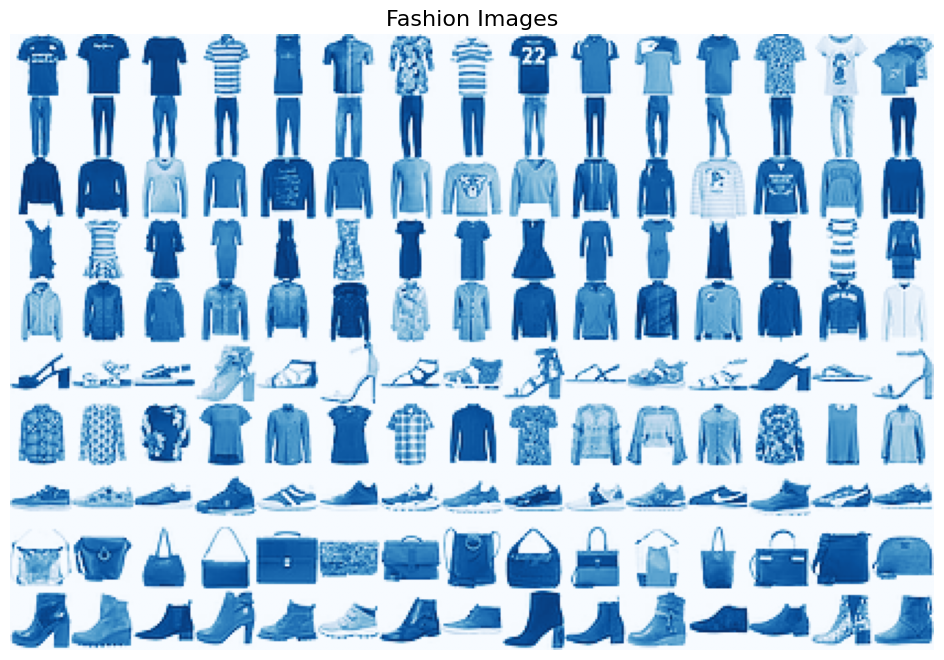

In [4]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [5]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(
    max_iter=2000,
    tol=0.001,
    random_state=42
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
f1

c:\Projects\ITMO_ML\itmo-ml.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7477878982429289

**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

Метрика **F1-score** измеряет качество классификатора, объединяя два показателя:

- **precision** — доля верных предсказаний среди всех предсказанных объектов класса
- **recall** — доля найденных моделью объектов класса среди всех объектов этого класса

F1-score — это гармоническое среднее precision и recall

$$
F_1 = \frac{2 \cdot precision \cdot recall}{precision + recall}.
$$
## +

- учитывает и точность, и полноту одновременно
- подходит для задач с несбалансированными классами
- более строгий критерий, чем accuracy

## -

- не учитывает истинные отрицания (TN)
- может быть менее интерпретируемой, чем accuracy
- не подходит, когда FP и FN имеют разную «стоимость» ошибок

## Что означает параметр `average='weighted'`?

В многоклассовых задачах F1-score считается для каждого класса отдельно.  
`average='weighted'` означает:

- берётся **взвешенное среднее** F1 по классам,
- вес каждого класса равен его доле в данных.

Такой подход корректно работает при **несбалансированном распределении классов**
## Другие варианты параметра `average`

### `macro`
- простое среднее всех F1 по классам
- все классы равны по важности
- полезно, если важны редкие классы

### `micro`
- считает TP, FP, FN глобально по всем классам
- отражает общую точность модели
- полезно, когда важна общая производительность

### `samples`
- используется в multilabel-задачах (когда каждый объект может иметь несколько меток)

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

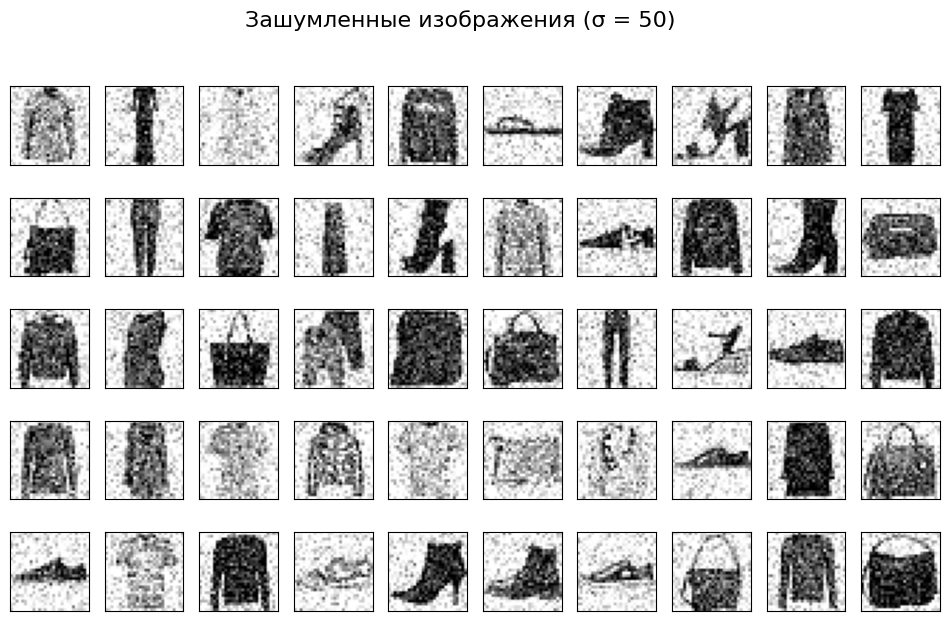

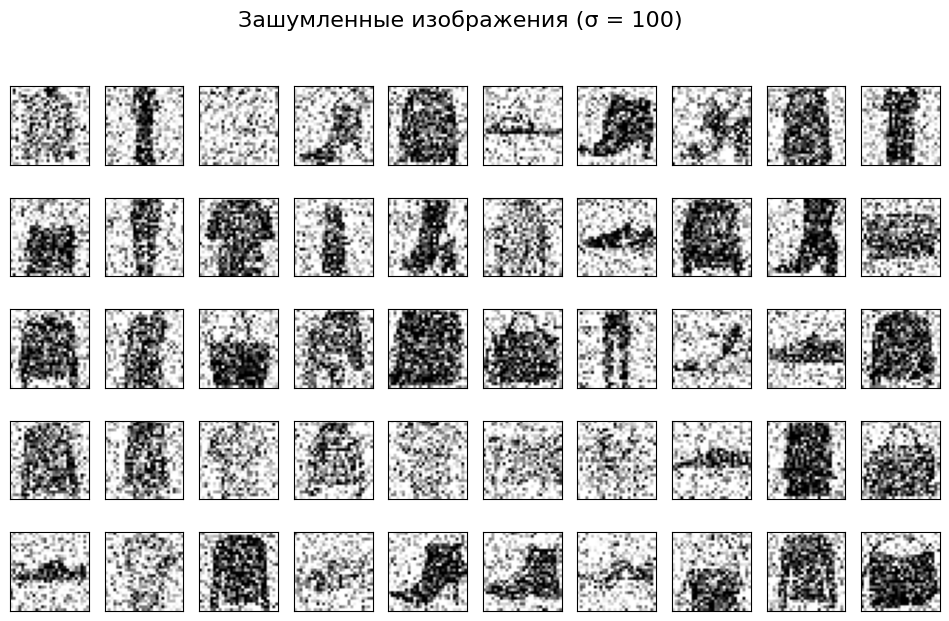

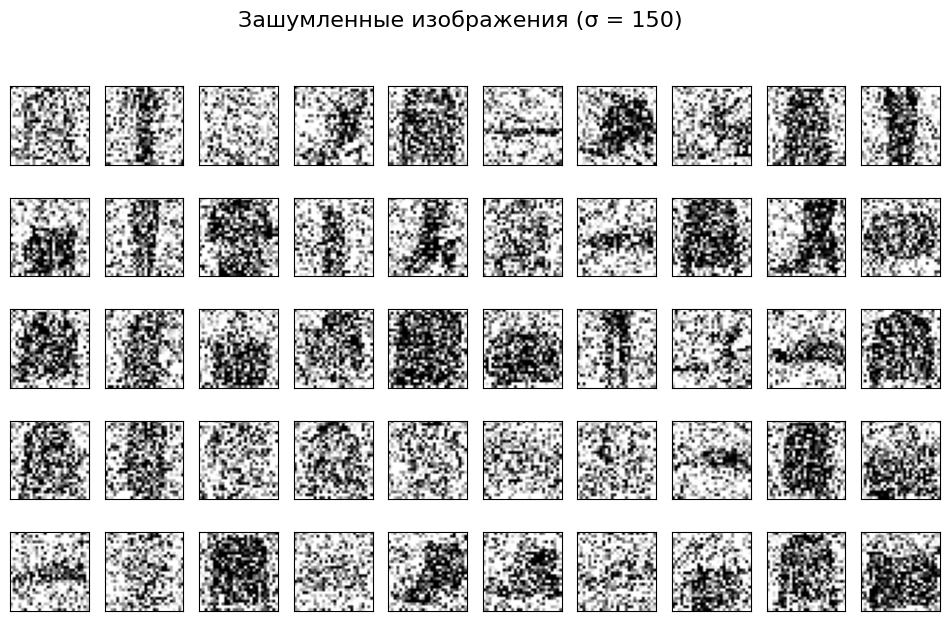

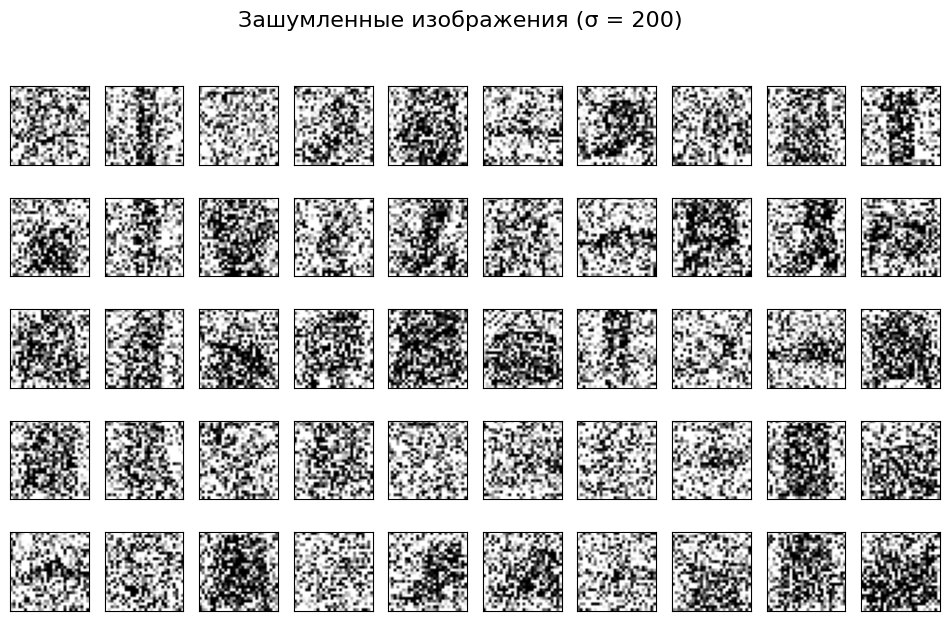

In [ ]:
scales = [50, 100, 150, 200]
X_test_noisy_dict = {}

# Преобразуем данные в float для корректного добавления шума
X_test_float = X_test.astype(np.float32)

for scale_val in scales:
    # Генерация зашумленных данных
    X_test_noisy = np.random.normal(loc=X_test_float, scale=scale_val)

    # Обрезаем значения до диапазона [0, 255] и преобразуем обратно в uint8
    X_test_noisy = np.clip(X_test_noisy, 0, 255).astype(np.uint8)

    # Сохраняем зашумленный набор данных в словарь
    X_test_noisy_dict[scale_val] = X_test_noisy

    # Визуализация примеров зашумленных изображений
    fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle(f'Зашумленные изображения (σ = {scale_val})', fontsize=16)

    for i, ax in enumerate(axes.flat):
        # Проверяем, что не выходим за границы массива
        if i < len(X_test_noisy):
            # Отображаем изображение в оттенках серого
            ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
        else:
            # Скрываем пустые субплоты
            ax.axis('off')
    plt.show()

**Ваши выводы:** 

- Гауссовский шум существенно влияет на качество изображений и снижает способность модели различать предметы
- Чем выше параметр `scale`, тем сильнее искажение и тем ниже качество классификации. При scale=50 некоторые детали еще различимы, но при scale=200 исходное содержимое изображения почти полностью скрыто шумом

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [10]:
results_noisy = {}

for scale_val, X_test_noisy in X_test_noisy_dict.items():
    y_pred_noisy = clf.predict(X_test_noisy)

    f1_noisy = f1_score(y_test, y_pred_noisy, average='weighted')
    results_noisy[scale_val] = f1_noisy
    print(f"F1-score (weighted) for noisy data (σ = {scale_val}): {f1_noisy:.4f}")

F1-score (weighted) for noisy data (σ = 50): 0.5320
F1-score (weighted) for noisy data (σ = 100): 0.3325
F1-score (weighted) for noisy data (σ = 150): 0.2423
F1-score (weighted) for noisy data (σ = 200): 0.1942


**Вывод:**

На основе анализа метрик F1-score можно сделать вывод, что увеличение уровня шума существенно снижает качество классификации модели. При стандартном отклонении σ=50 модель сохраняет частичную работоспособность, однако при σ=200 качество предсказаний падает до уровня случайного угадывания

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

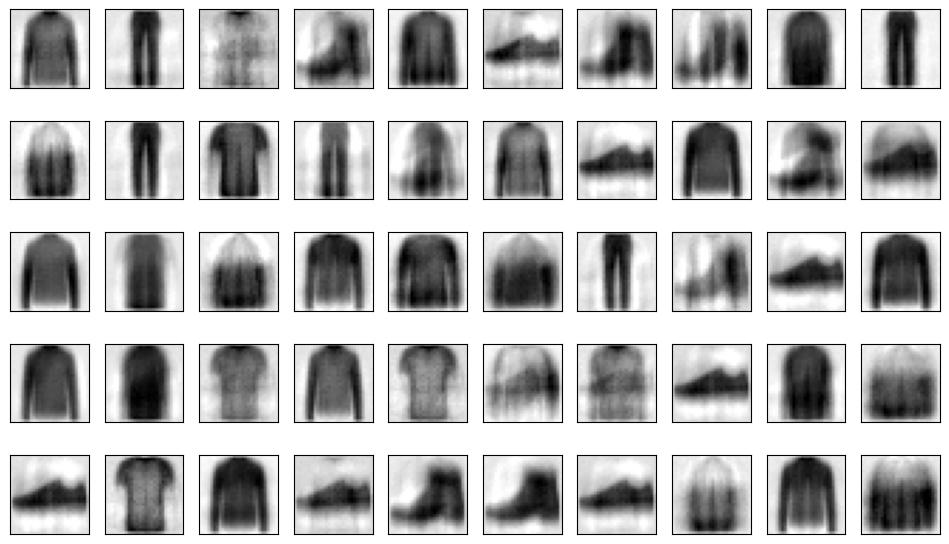

In [11]:
from sklearn.decomposition import PCA

# Список долей объяснённой дисперсии
explained_variances = [round(v, 1) for v in np.arange(0.1, 1.0, 0.1)]

# Словарь: ключ (scale, explained_variance) -> восстановленная матрица
restored_dict = {}

# Проходим по всем уровням шума и всем значениям explained_variance
for scale_val, X_test_noisy in X_test_noisy_dict.items():
    X_noisy_float = X_test_noisy.astype(np.float32)

    for ev in explained_variances:
        # PCA по доле объяснённой дисперсии
        pca = PCA(n_components=ev, svd_solver='full', random_state=42)
        pca.fit(X_noisy_float)

        # уменьшаем размерность и восстанавливаем обратно
        X_reduced = pca.transform(X_noisy_float)
        X_restored = pca.inverse_transform(X_reduced)

        # приводим к диапазону и uint8
        X_restored_uint8 = np.clip(X_restored, 0, 255).astype(np.uint8)

        restored_dict[(scale_val, ev)] = X_restored_uint8

# Для визуализации выбираем комбинацию:
scale_display = 50
ev_display = 0.5

restored_X_test_noisy = restored_dict.get((scale_display, ev_display),
                                          next(iter(restored_dict.values())))


fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Вывод:**

После применения PCA к зашумлённым данным изображения действительно становятся визуально более сглаженными. Шум уменьшается, контуры становятся чище и лучше различимы

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [14]:
import pandas as pd
results = []
noise_scales = [50, 100, 150, 200]
explained_variances = np.arange(0.1, 1.0, 0.1)

for scale in noise_scales:
    X_noisy = X_test + np.random.normal(0, scale, X_test.shape)
    X_noisy = np.clip(X_noisy, 0, 255)

    for ev in explained_variances:
        pca = PCA(n_components=ev, svd_solver='full', random_state=42)
        pca.fit(X_noisy)

        X_reduced = pca.transform(X_noisy)
        X_restored = pca.inverse_transform(X_reduced)

        y_pred_restored = clf.predict(X_restored)

        f1 = f1_score(y_test, y_pred_restored, average='weighted')

        results.append((scale, ev, f1))

df_results = pd.DataFrame(results, columns=["noise_scale", "explained_variance", "f1_score"])
df_results

,noise_scale,explained_variance,f1_score
0,50,0.1,0.042957
1,50,0.2,0.042957
2,50,0.3,0.195519
3,50,0.4,0.343599
4,50,0.5,0.483814
5,50,0.6,0.595417
6,50,0.7,0.641887
7,50,0.8,0.615452
8,50,0.9,0.564670
9,100,0.1,0.040607


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

Таблица f1_score (восстановленные изображения):


explained_variance,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
noise_scale,,,,,,,,,
50,0.042957,0.042957,0.195519,0.343599,0.483814,0.595417,0.641887,0.615452,0.564670
100,0.040607,0.238661,0.411875,0.434761,0.426748,0.408740,0.396109,0.380103,0.353232
150,0.156171,0.325869,0.321140,0.293633,0.277724,0.272909,0.258949,0.257580,0.235431
200,0.228807,0.222765,0.227200,0.222002,0.211384,0.192089,0.186825,0.182364,0.174205


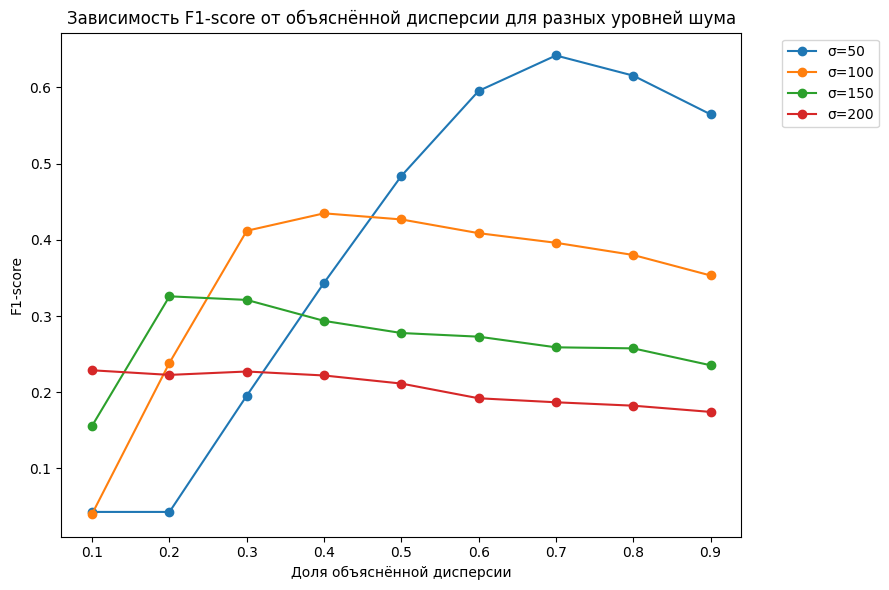

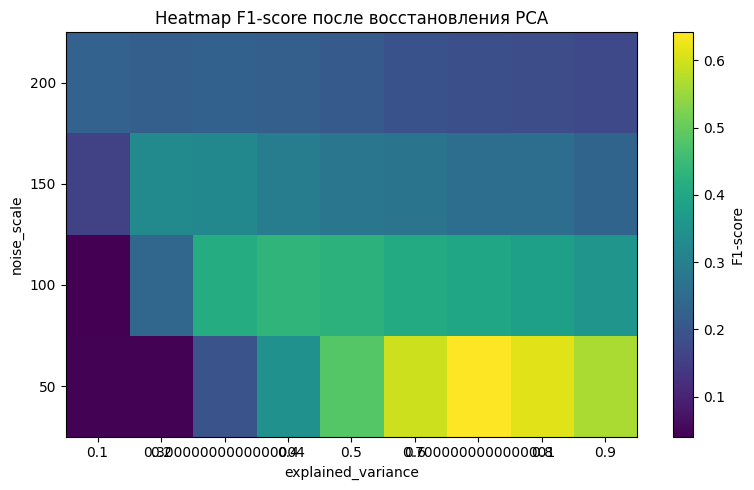

In [16]:

pivot_table = df_results.pivot(index='noise_scale',
                               columns='explained_variance',
                               values='f1_score').sort_index()

print("Таблица f1_score (восстановленные изображения):")
display(pivot_table)

plt.figure(figsize=(9,6))
for scale_val in sorted(pivot_table.index):
    plt.plot(pivot_table.columns,
             pivot_table.loc[scale_val],
             marker='o',
             label=f'σ={scale_val}')

plt.xlabel('Доля объяснённой дисперсии')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от объяснённой дисперсии для разных уровней шума')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(8,5))
im = plt.imshow(pivot_table.values, aspect='auto', origin='lower', interpolation='nearest')
plt.colorbar(im, label='F1-score')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel("explained_variance")
plt.ylabel("noise_scale")
plt.title("Heatmap F1-score после восстановления PCA")
plt.tight_layout()
plt.show()


**Ваши выводы:** 

PCA действительно улучшает качество классификации зашумленных изображений. После восстановления изображения становятся ближе к исходным, и F1-score возрастает

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**
## 1. SNE

### 1.1. Постановка

В **исходном пространстве** (high-dim)

- Условные вероятности  
  $$
  p_{j\mid i} = \frac{\exp\!\left(-\frac{\lVert x_i - x_j\rVert^2}{2\sigma_i^2}\right)}
                       {\sum_{k\neq i} \exp\!\left(-\frac{\lVert x_i - x_k\rVert^2}{2\sigma_i^2}\right)},
  \qquad p_{i\mid i} = 0
  $$

В **пространстве отображения**

- Условные вероятности  
  $$
  q_{j\mid i} = \frac{\exp\!\left(-\lVert y_i - y_j\rVert^2\right)}
                       {\sum_{k\neq i} \exp\!\left(-\lVert y_i - y_k\rVert^2\right)},
  \qquad q_{i\mid i} = 0.
  $$

Функционал, минимизируемый в SNE

$$
C_{\text{SNE}} = \sum_i KL(P_i\;\|\;Q_i)
= \sum_i \sum_j p_{j\mid i} \log \frac{p_{j\mid i}}{q_{j\mid i}}.
$$

Здесь $P_i$ и $Q_i$ — распределения соседей для точки $i$ в исходном и отображённом пространствах

### 1.2. Градиент для SNE

По $y_i$ функционал зависит и через $q_{j\mid i}$, и через $q_{i\mid j}$ (так как расстояния между точками симметричны). Итоговая формула градиента (для **асимметричного SNE**) имеет вид

$$
\frac{\partial C_{\text{SNE}}}{\partial y_i}
=
2 \sum_j
\bigl(
  p_{j\mid i} - q_{j\mid i}
  + p_{i\mid j} - q_{i\mid j}
\bigr) (y_i - y_j).
$$

## 2. t-SNE

### 2.1. Постановка

В t-SNE сначала симметризуют вероятности в исходном пространстве

$$
p_{ij} = \frac{p_{j\mid i} + p_{i\mid j}}{2n}, \qquad p_{ii} = 0,
$$



В низкоразмерном пространстве используют **распределение Стьюдента с одной степенью свободы** (тяжёлые хвосты)

1. Вычисляют "сырые" веса
   $$
   w_{ij} = \frac{1}{1 + \lVert y_i - y_j\rVert^2},\qquad w_{ii} = 0
   $$

2. Нормируют
   $$
   q_{ij} = \frac{w_{ij}}{\sum_{k\neq l} w_{kl}}, \qquad q_{ii}=0
   $$

Функционал

$$
C_{\text{t-SNE}} = KL(P \;\|\; Q)
= \sum_{i\neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}.
$$

### 2.2. Градиент для t-SNE

Стандартная итоговая формула:

$$
\frac{\partial C_{\text{t-SNE}}}{\partial y_i}
=
4 \sum_j
\bigl(p_{ij} - q_{ij}\bigr)\,
\frac{(y_i - y_j)}{1 + \lVert y_i - y_j\rVert^2}
$$




## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [13]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.